# ML Reserving - 2025-06-05 (work in progress)

<a target="_blank" href="https://colab.research.google.com/github/Techtonique/mlreserving/blob/main/mlreserving/demo/2025_06_05_ml_reserving.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
!pip install git+https://github.com/Techtonique/mlreserving.git --verbose

   development  origin  values
0         1981    1981 5012.00
1         1982    1982  106.00
2         1983    1983 3410.00
3         1984    1984 5655.00
4         1985    1985 1092.00
    development  origin   values
50         1989    1982 16169.00
51         1990    1983 23466.00
52         1989    1981 18662.00
53         1990    1982 16704.00
54         1990    1981 18834.00

Using log transformations


Mean predictions:


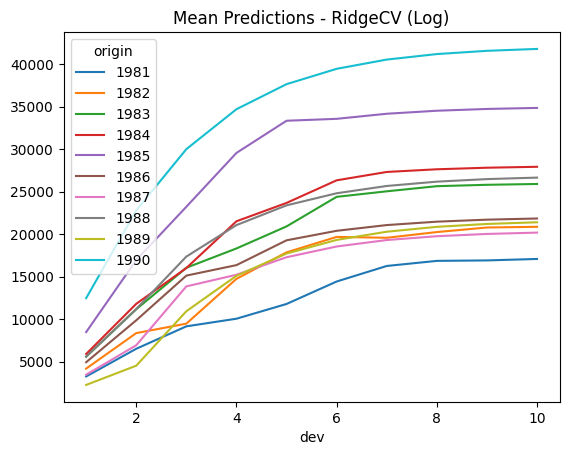


Lower bound (95%):


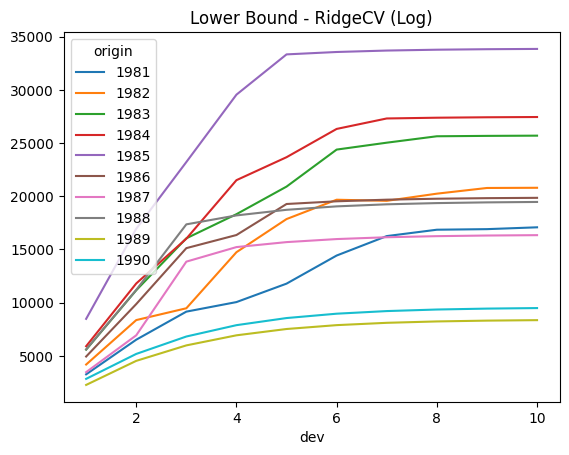


Upper bound (95%):


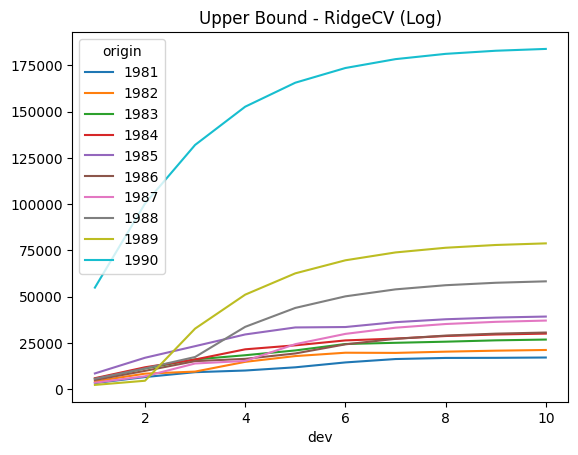

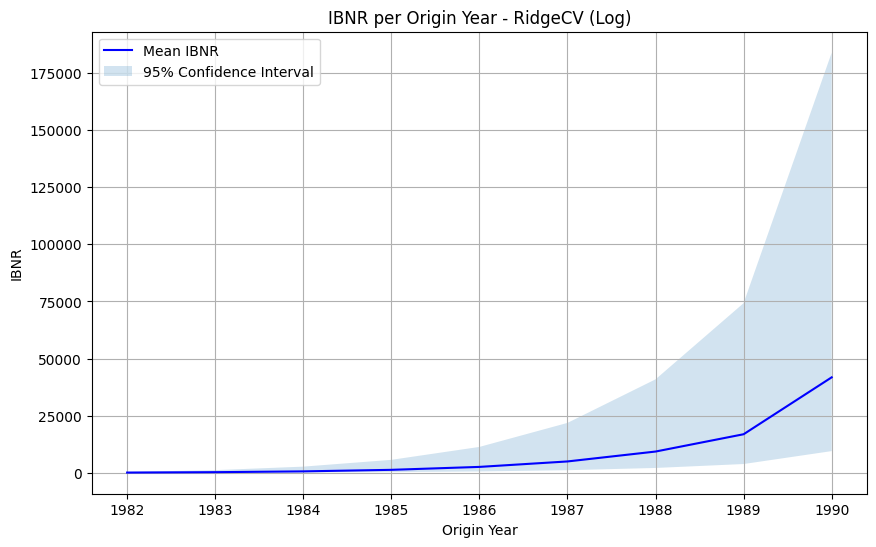


Mean predictions:


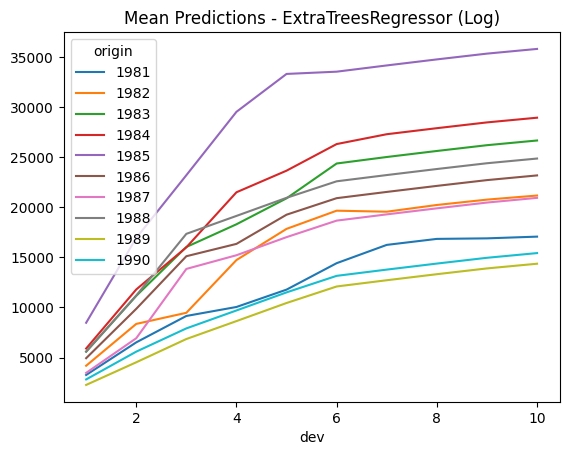


Lower bound (95%):


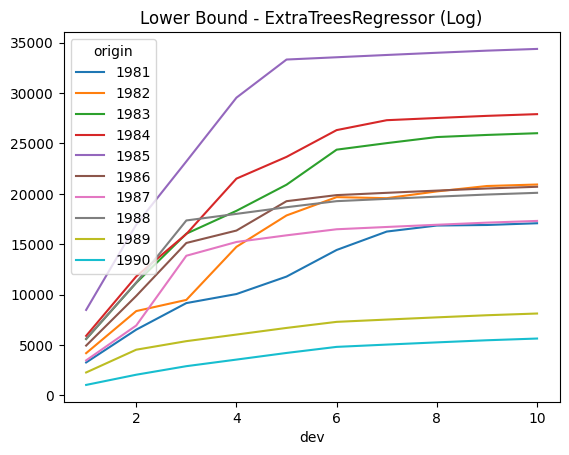


Upper bound (95%):


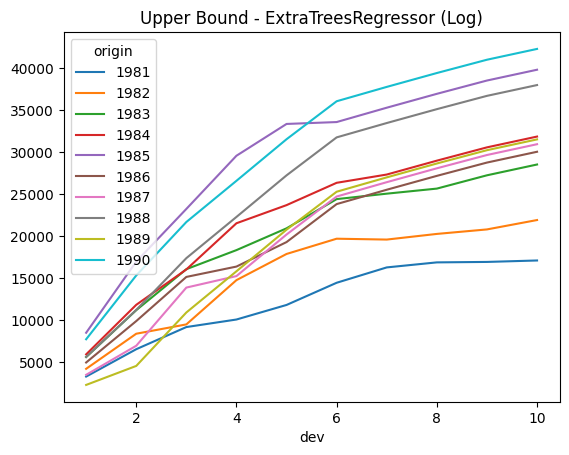

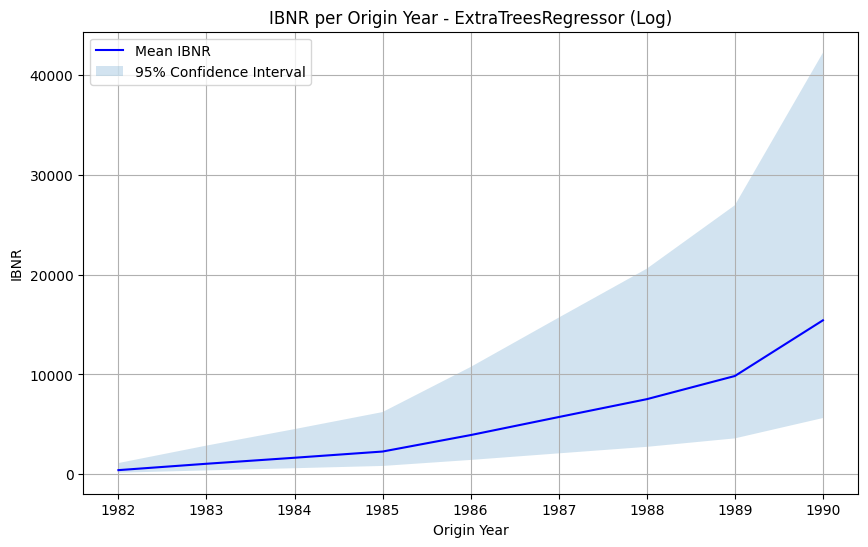


Mean predictions:


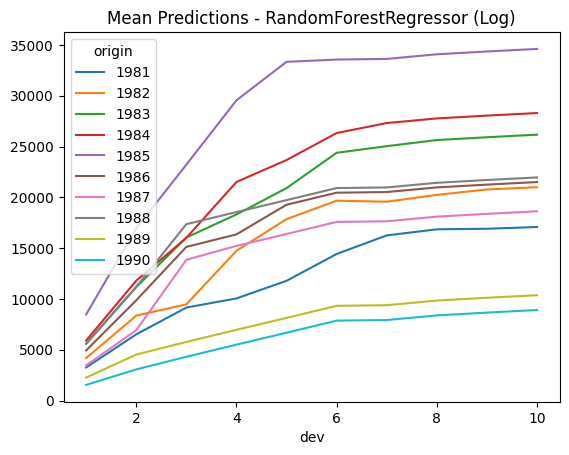


Lower bound (95%):


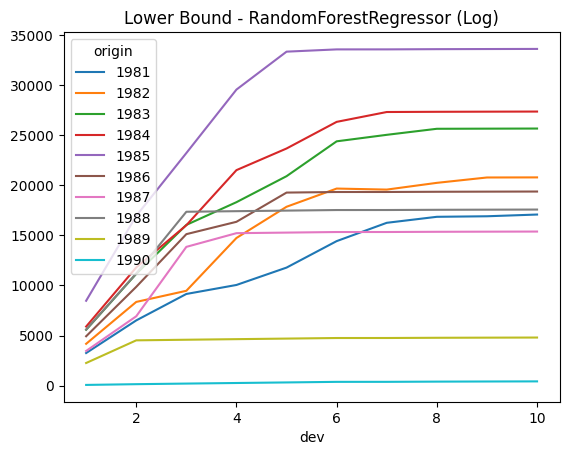


Upper bound (95%):


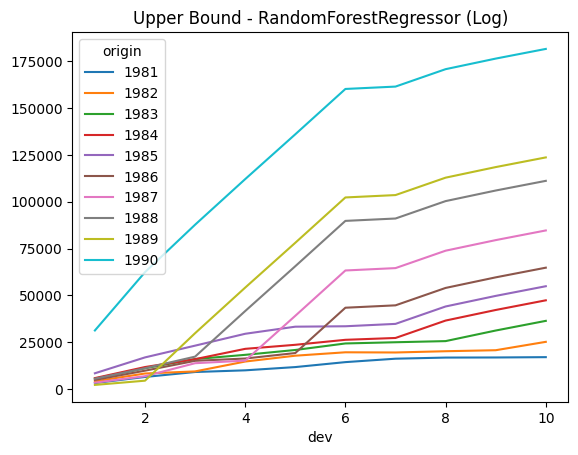

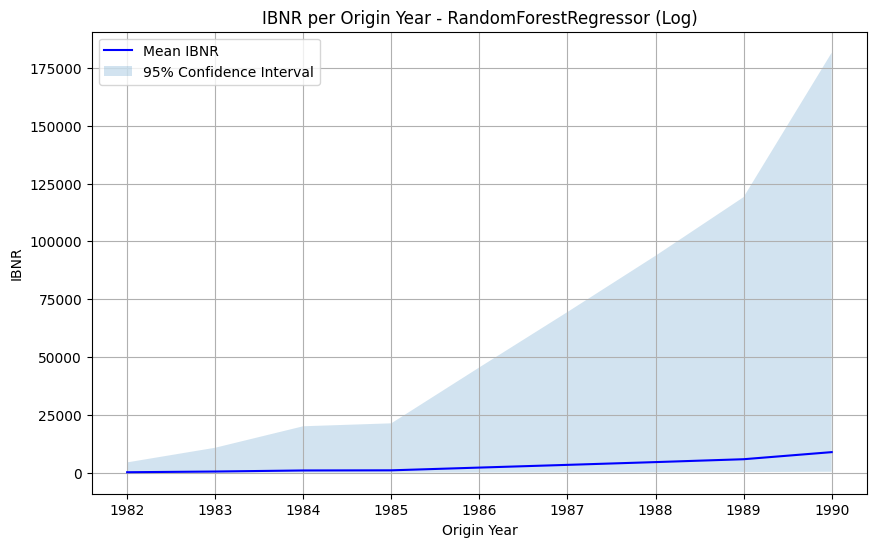


Using factors


Mean predictions:


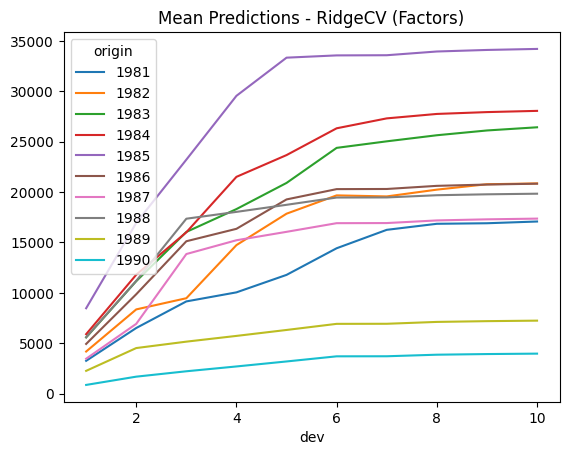


Lower bound (95%):


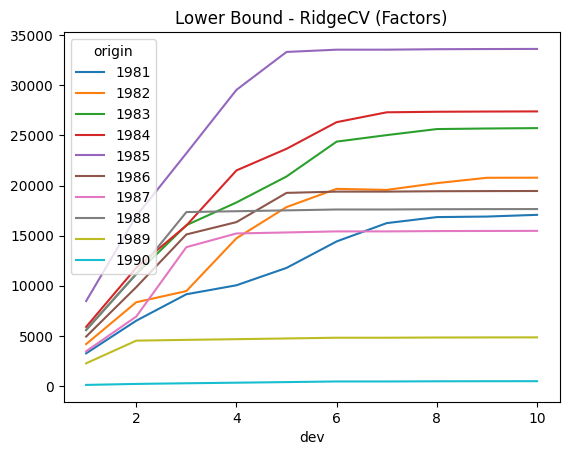


Upper bound (95%):


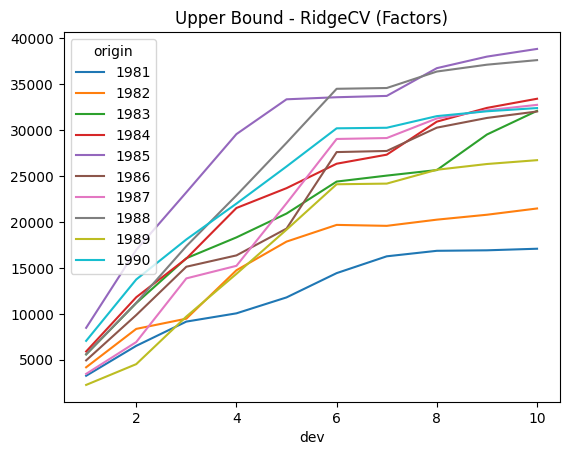

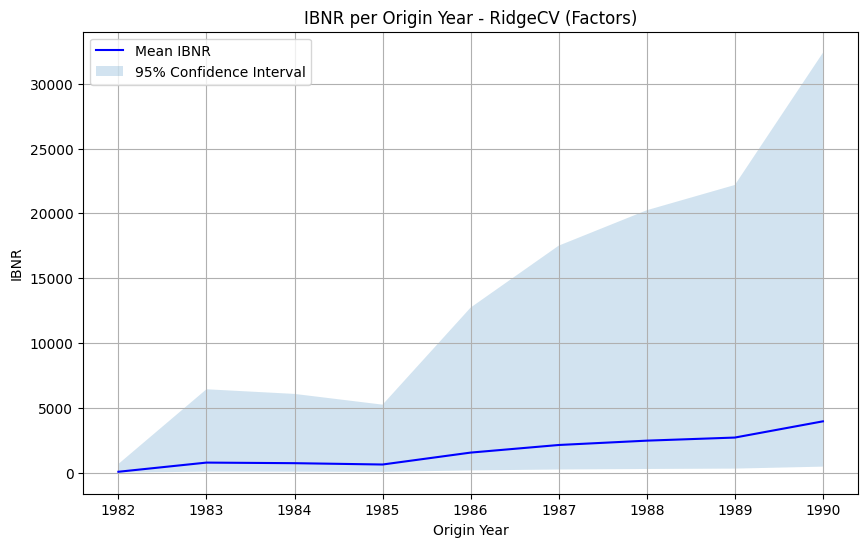


Mean predictions:


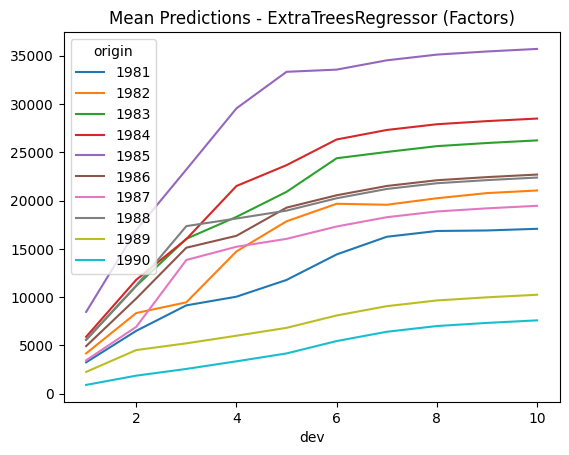


Lower bound (95%):


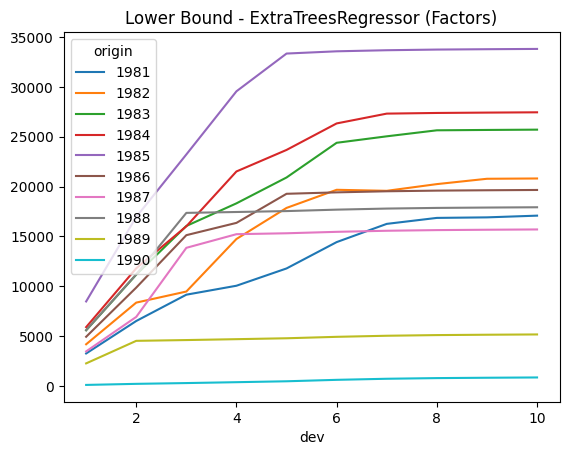


Upper bound (95%):


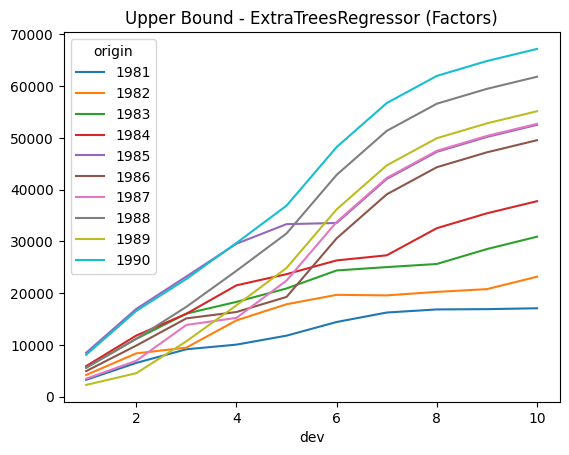

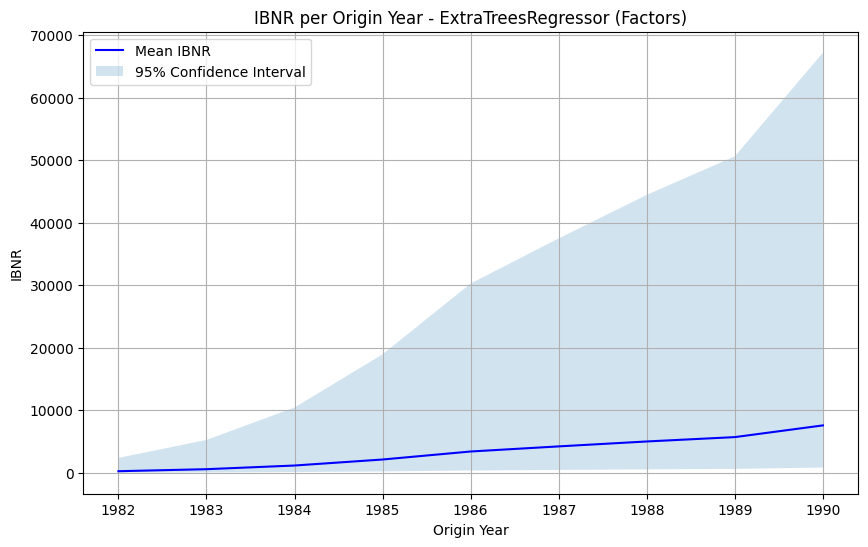


Mean predictions:


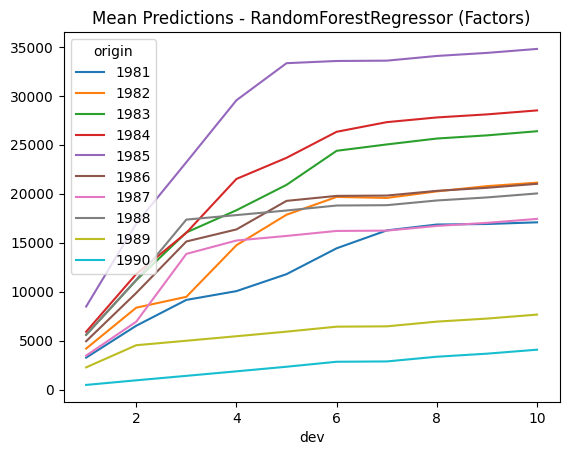


Lower bound (95%):


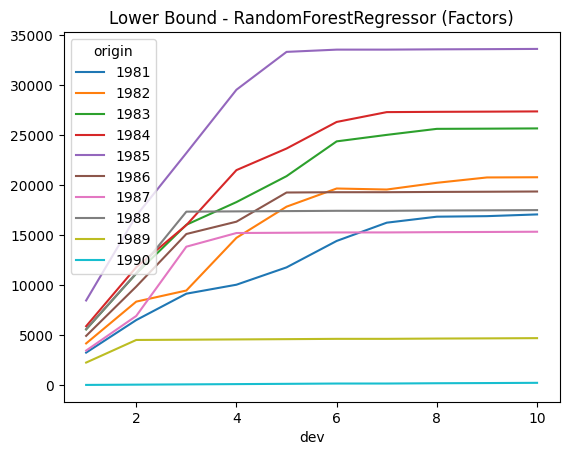


Upper bound (95%):


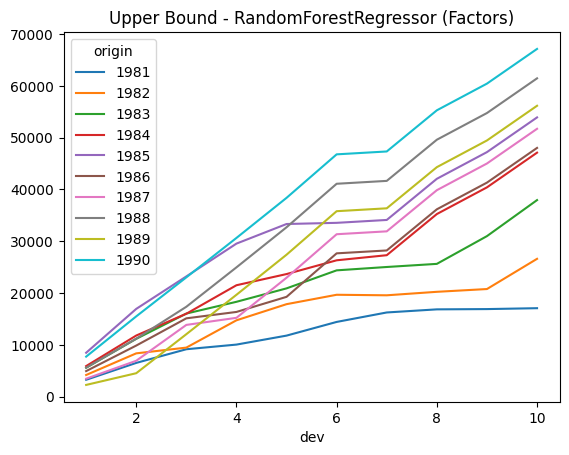

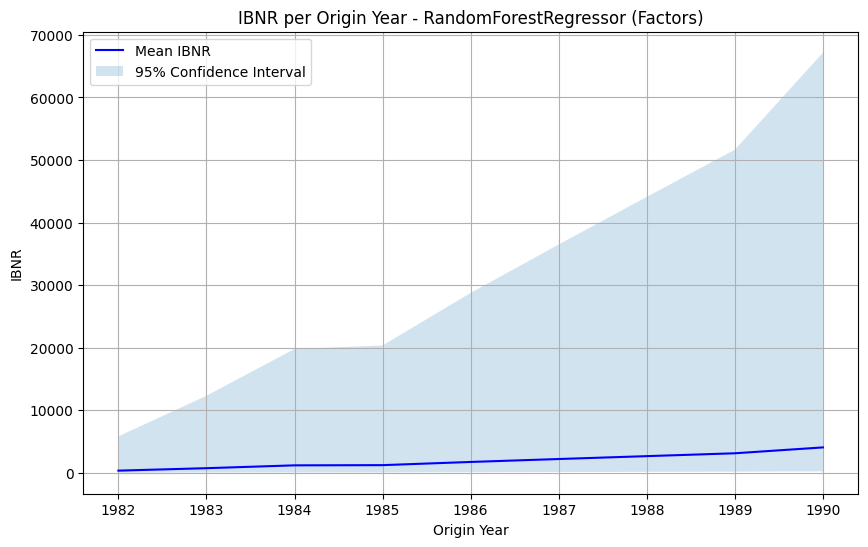

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlreserving import MLReserving
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import RidgeCV

# Load the dataset
url = "https://raw.githubusercontent.com/Techtonique/datasets/refs/heads/main/tabular/triangle/raa.csv"
df = pd.read_csv(url)

print(df.head())
print(df.tail())
#df["values"] = df["values"]/1000

models = [RidgeCV(), ExtraTreesRegressor(), RandomForestRegressor()]

# Try both factor and non-factor approaches
for use_factors in [False, True]:
    print(f"\n{'='*50}")
    print(f"Using {'factors' if use_factors else 'log transformations'}")
    print(f"{'='*50}\n")

    for mdl in models:
        # Initialize the model with prediction intervals
        model = MLReserving(model=mdl,
            level=95,  # 95% confidence level
            use_factors=use_factors,  # Use categorical encoding
            random_state=42
        )

        # Fit the model
        model.fit(df, origin_col="origin", development_col="development", value_col="values")

        # Make predictions with intervals
        result = model.predict() # triangles, with lower and upper bounds
        ibnr = model.get_ibnr()

        # Display results
        print("\nMean predictions:")
        result.mean.plot()
        plt.title(f'Mean Predictions - {mdl.__class__.__name__} ({use_factors and "Factors" or "Log"})')
        plt.show()

        print("\nLower bound (95%):")
        result.lower.plot()
        plt.title(f'Lower Bound - {mdl.__class__.__name__} ({use_factors and "Factors" or "Log"})')
        plt.show()

        print("\nUpper bound (95%):")
        result.upper.plot()
        plt.title(f'Upper Bound - {mdl.__class__.__name__} ({use_factors and "Factors" or "Log"})')
        plt.show()

        # Plot IBNR
        plt.figure(figsize=(10, 6))
        plt.plot(ibnr.mean.index, ibnr.mean.values, 'b-', label='Mean IBNR')
        plt.fill_between(ibnr.mean.index,
                         ibnr.lower.values,
                         ibnr.upper.values,
                        alpha=0.2,
                        label='95% Confidence Interval')
        plt.title(f'IBNR per Origin Year - {mdl.__class__.__name__} ({use_factors and "Factors" or "Log"})')
        plt.xlabel('Origin Year')
        plt.ylabel('IBNR')
        plt.legend()
        plt.grid(True)
        plt.show()